In [1]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(DataExplorer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




ERROR: Error in library(DataExplorer): there is no package called ‘DataExplorer’


In [2]:
# import the data from csv files
data = read.csv("/home/vikram/Downloads/homework ML/CC.csv")

In [3]:
# convert the data object as data frame
data = as.data.frame(data)

In [4]:
# checking the top 6 entries of the data frame
head(data)

,X,Time,V1,V2,V3,V4,V5,V6,V7,V8,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [5]:
# checking our column names which are our features
colnames(data)

[1] "X"      "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"    
 [9] "V7"     "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"   
[17] "V15"    "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"   
[25] "V23"    "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [6]:
#checking the dimensions
dim(data)

[1] 284807     32

In [7]:
#checking for na values
colSums(is.na(data))
sum(is.na(data))

X   Time     V1     V2     V3     V4     V5     V6     V7     V8     V9 
     0      0      0      0      0      0      0      0      0      0      0 
   V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20 
     0      0      0      0      0      0      0      0      0      0      0 
   V21    V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0      0

[1] 0

In [8]:
# checking summary for entire dataframe
summary(data)

       X               Time              V1                  V2           
 Min.   :     1   Min.   :     0   Min.   :-56.40751   Min.   :-72.71573  
 1st Qu.: 71202   1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855  
 Median :142404   Median : 84692   Median :  0.01811   Median :  0.06549  
 Mean   :142404   Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000  
 3rd Qu.:213606   3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372  
 Max.   :284807   Max.   :172792   Max.   :  2.45493   Max.   : 22.05773  
       V3                 V4                 V5                   V6          
 Min.   :-48.3256   Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605  
 1st Qu.: -0.8904   1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683  
 Median :  0.1799   Median :-0.01985   Median :  -0.05434   Median : -0.2742  
 Mean   :  0.0000   Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000  
 3rd Qu.:  1.0272   3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986  
 

In [9]:
#it is visible here that Amount was not already scaled thus,
# checking summary for amount , checking variance and SD and scaling
sum_amt=data$Amount
summary(sum_amt)
var(sum_amt)
sd(sum_amt)
data$Amount=scale(data$Amount)
head(data)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.60    22.00    88.35    77.17 25691.16 

[1] 62560.07

[1] 250.1201

,X,Time,V1,V2,V3,V4,V5,V6,V7,V8,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<int>
1,1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.24496383,0
2,2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,-0.34247394,0
3,3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,1.16068389,0
4,4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.14053401,0
5,5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,-0.07340321,0
6,6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,-0.33855582,0


In [10]:
table(data$Class)



     0      1 
284315    492 

In [11]:
prop.table(table(data$Class))


          0           1 
0.998272514 0.001727486 

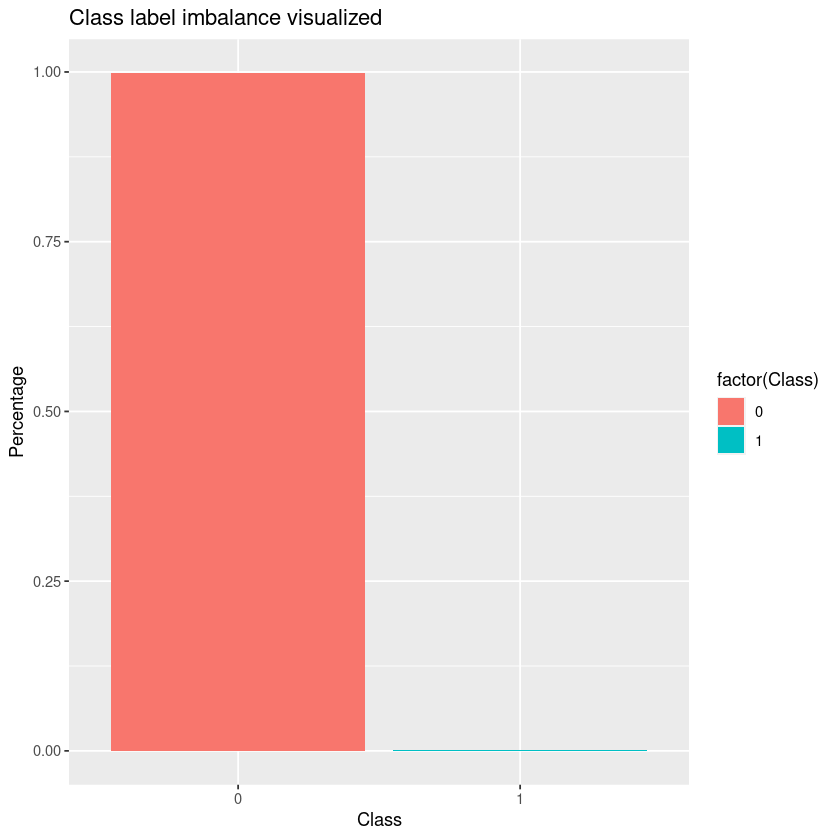

In [12]:
#plotting some important stuff
# plot 1 : class label imbalance visualized
ggplot(data= data, aes(x=factor(Class),y=prop.table(stat(count)), fill=factor(Class), label = scales::percent(prop.table(stat(count)))))+
geom_bar()+
labs(x="Class", y="Percentage")+
ggtitle("Class label imbalance visualized")

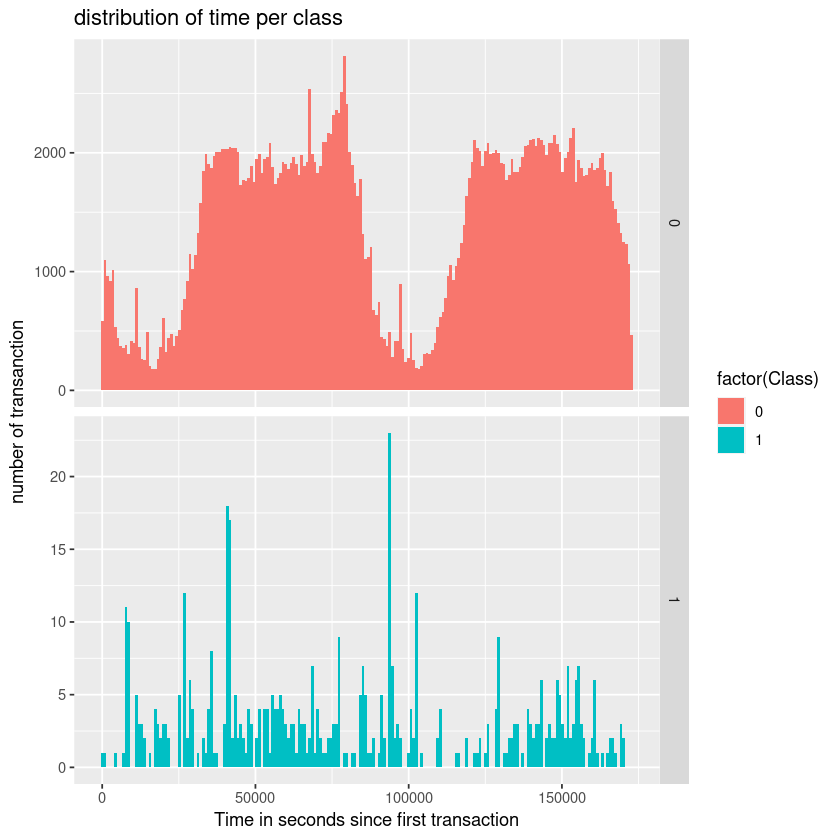

In [13]:
#creating plot 2 time transaction distribution per class

data %>%
    ggplot(aes(x=Time, fill= factor(Class)))+ geom_histogram(bins=200) + labs(x='Time in seconds since first transaction', y= 'number of transanction')+ ggtitle('distribution of time per class')+facet_grid(Class ~ ., scales= 'free_y')
#we find that the time variance of fraud is more equally distributed whereas the not fraud tends to have cyclic behaviour with cooldowns in between
#this pat of code was designed by geeksforgeeks in python and was translated and put to use

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


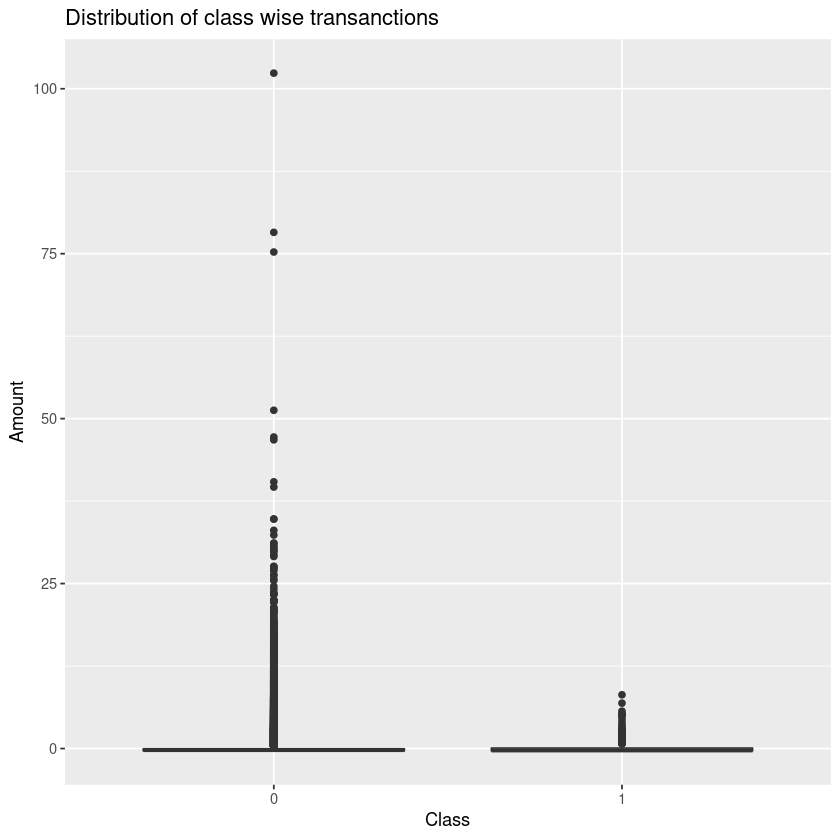

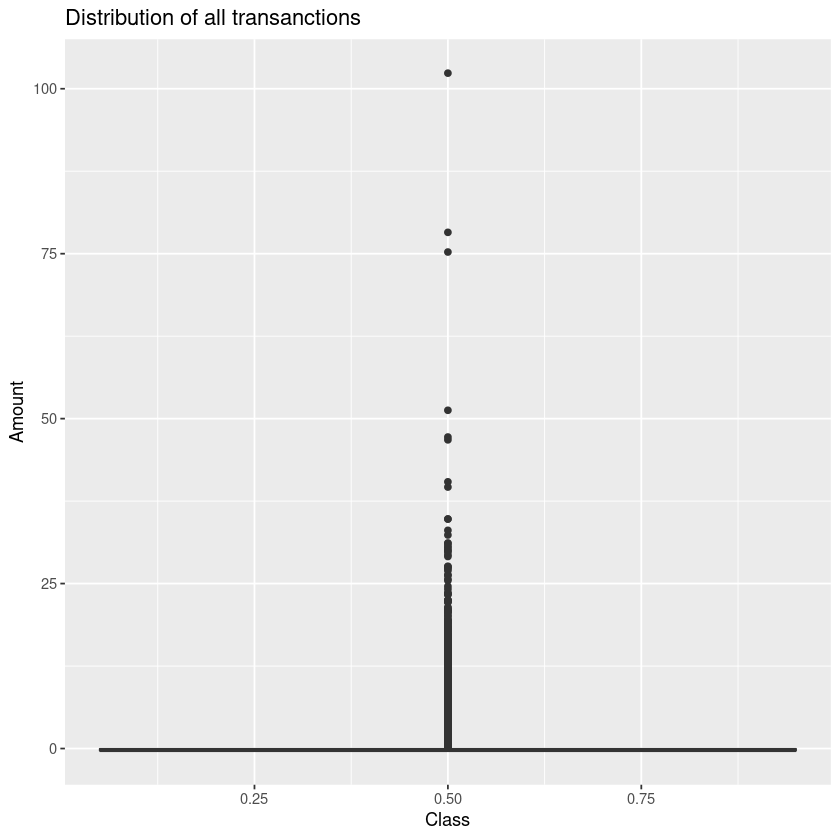

In [14]:
# plot 3 finding distribution of transanction amount accourding to class

ggplot(data, aes(x= factor(Class), y= Amount))+ geom_boxplot()+labs(x="Class", y="Amount")+ ggtitle("Distribution of class wise transanctions")

ggplot(data, aes(x= Class, y= Amount))+ geom_boxplot()+labs(x="Class",y="Amount")+ggtitle("Distribution of all transanctions")

       V1          
 Min.   :-0.35323  
 1st Qu.:-0.34923  
 Median :-0.31625  
 Mean   : 0.13538  
 3rd Qu.: 0.07013  
 Max.   : 8.14617  

       V1           
 Min.   : -0.35323  
 1st Qu.: -0.33064  
 Median : -0.26527  
 Mean   : -0.00023  
 3rd Qu.: -0.04518  
 Max.   :102.36206  

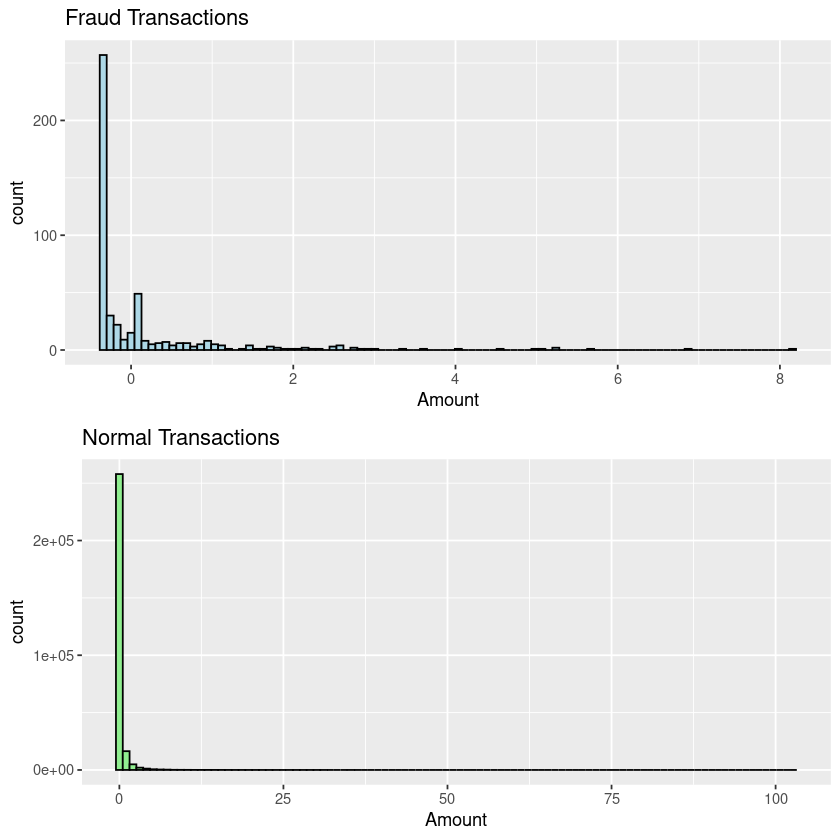

In [16]:
# plot 4 Distribution of the transanction Amount in density of transanctions performed in fraud or not fraud
fraudData <- subset(data,Class=='1')
summary(fraudData$Amount)
notFraudData <- subset(data,Class=='0')
summary(notFraudData$Amount)
p3 <- ggplot(fraudData, aes(x = Amount)) +
        geom_histogram(bins=100,fill="light blue", colour = "black") + labs(title=expression("Fraud Transactions"))
p4 <- ggplot(notFraudData, aes(x = Amount)) +
        geom_histogram(bins=100,fill="light green", colour = "black") + labs(title=expression("Normal Transactions"))
grid.arrange(p3, p4)

In [17]:
plot_correlation(data, maxcat = 8L)

ERROR: Error in plot_correlation(data, maxcat = 8L): could not find function "plot_correlation"


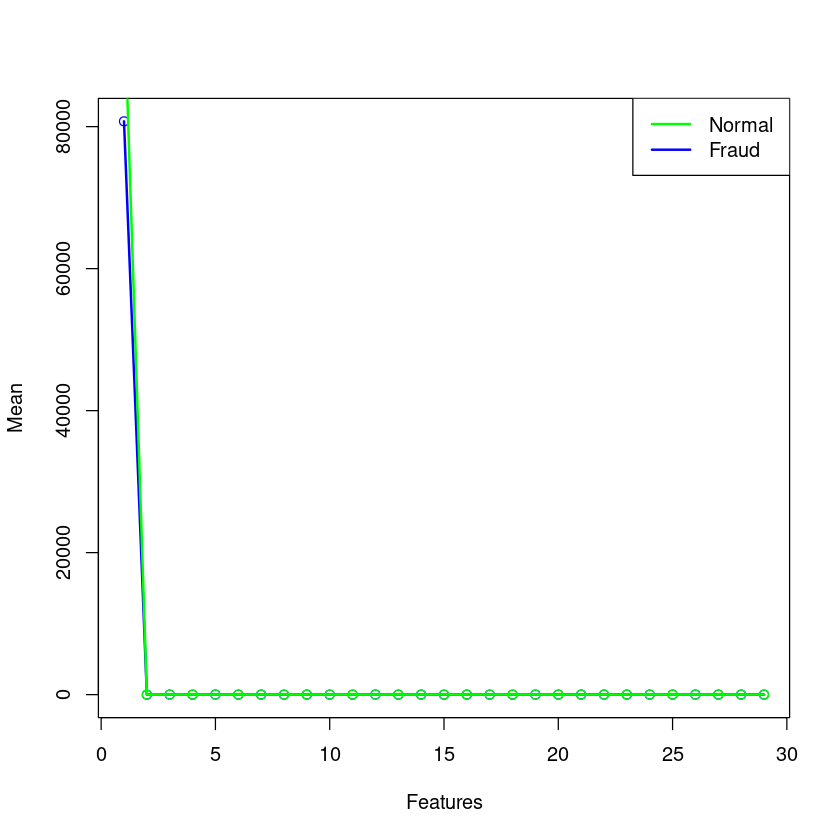

In [18]:
#No PCA component from V1 to V28 have any correlation to each other 
# highly likely that data was PCA transformed
# Time has correlations with V but not with Amount
# V mostly has good correlation with Class
# Amount has correlation with V but not with Time
# Class has no significant correlation with Time and Amount

skew <- sum(as.numeric(data$Class))/nrow(data)
mugood <- apply(notFraudData[sample(rownames(notFraudData), size = as.integer(skew *nrow(data)), replace = T), -c(1, 30, 31)], 2, mean)
muanom <- apply(fraudData[, -c(1, 30, 31)], 2, mean)
plot(muanom, col = "blue", xlab = "Features", ylab = "Mean")
lines(muanom, col = "blue", lwd = 2)
points(mugood, col = "green")
lines(mugood, col = "green", lwd = 2)
legend("topright", legend = c("Normal", "Fraud"), lty = c(1,1), col = c("green", "blue"), lwd = c(2,2))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 999 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 999 rows containing non-finite values (stat_density).”


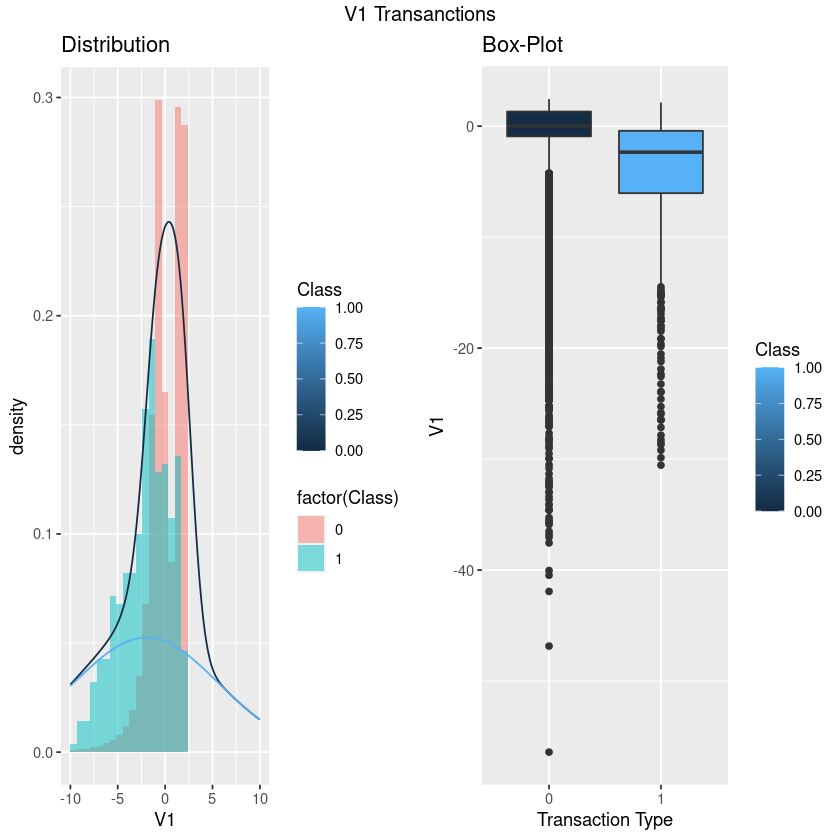

In [19]:
# mean values for variables for fraud transanction are different than normal transanction for most of the variables
# mean of fraud differs a lot
# mean of no fraud dont differ much

#looking into variables and understanding their distribution

#forV1
p1 <- ggplot(data, aes(x = V1, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V1, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V1 Transanctions", ncol = 2)

In [20]:
#Distribution in histogram:Some Overlap
#Variation in box plot:parially similar
#Usefulness:yes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 777 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 777 rows containing non-finite values (stat_density).”


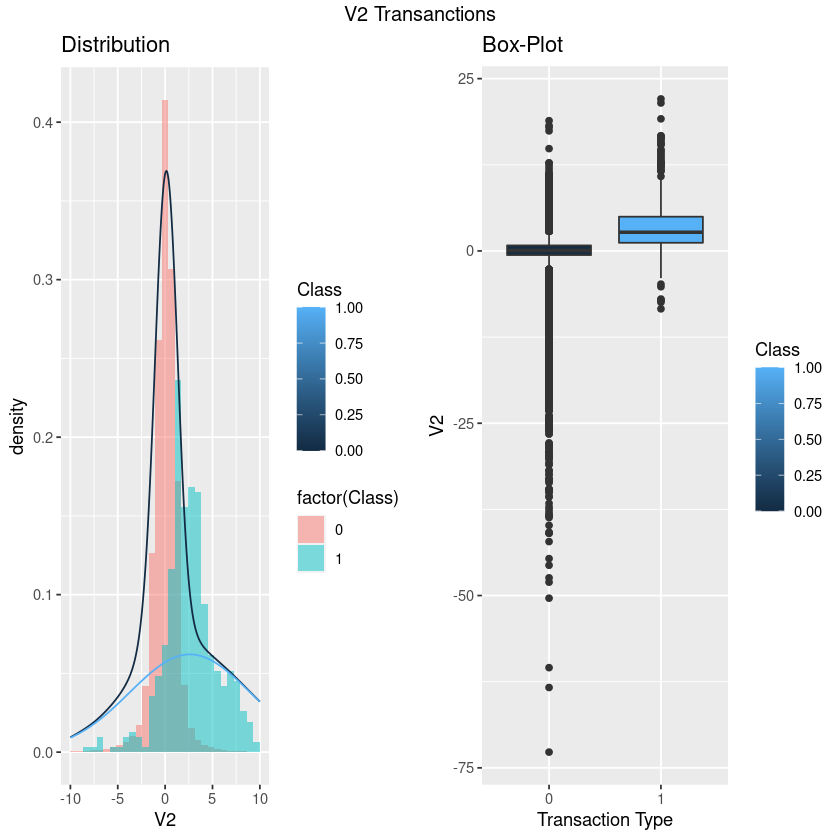

In [21]:
#for V2
p1 <- ggplot(data, aes(x = V2, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V2, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V2 Transanctions", ncol = 2)

In [22]:
#Distribution in histogram:Similar 
#Variation in box plot:similar
#Usefulness:Not Sure

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 271 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 271 rows containing non-finite values (stat_density).”


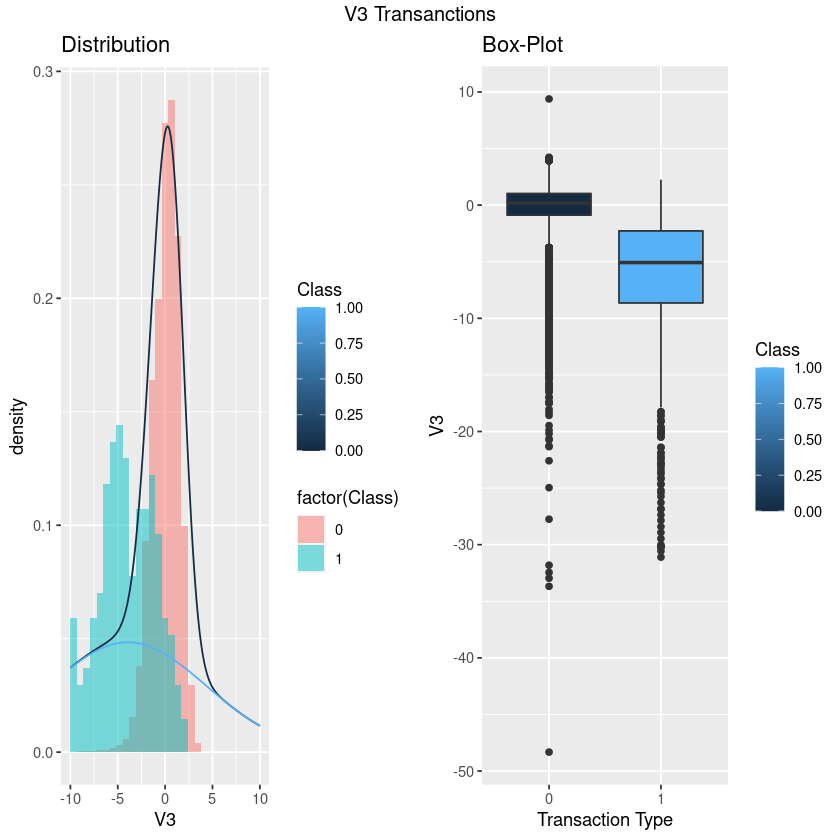

In [23]:
#for V3
p1 <- ggplot(data, aes(x = V3, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V3, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V3 Transanctions", ncol = 2)

In [24]:
#Distribution in histogram:similar
#Variation in box plot:some overlap but different mean
#Usefulness:yes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 55 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 55 rows containing non-finite values (stat_density).”


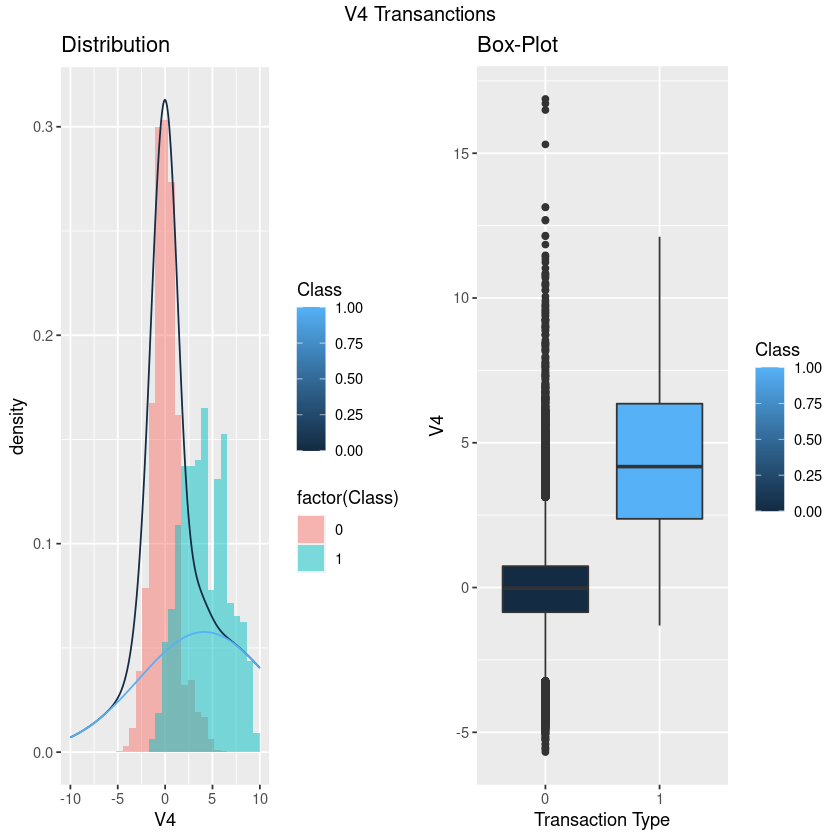

In [25]:
#for V4
p1 <- ggplot(data, aes(x = V4, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V4, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V4 Transanctions", ncol = 2)

In [26]:
#Distribution in histogram:similar
#Variation in box plot:very similar
#Usefulness:not sure

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 401 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 401 rows containing non-finite values (stat_density).”


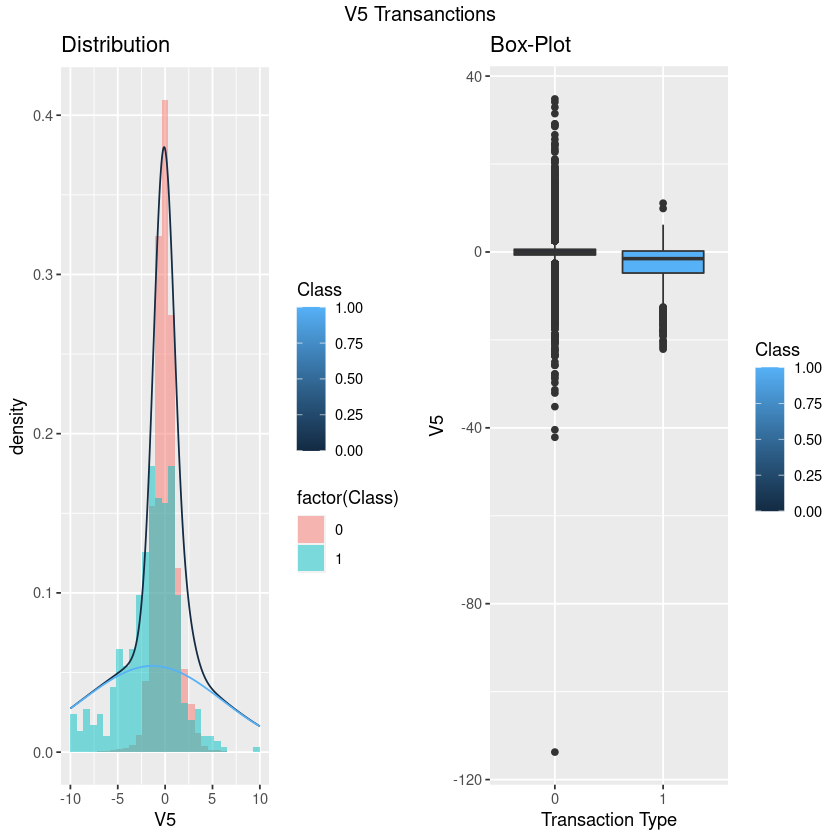

In [27]:
#for V5
p1 <- ggplot(data, aes(x = V5, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V5, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V5 Transanctions", ncol = 2)

In [28]:
#Distribution in histogram:similar
#Variation in box plot:almost identical
#Usefulness:no


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 112 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 112 rows containing non-finite values (stat_density).”


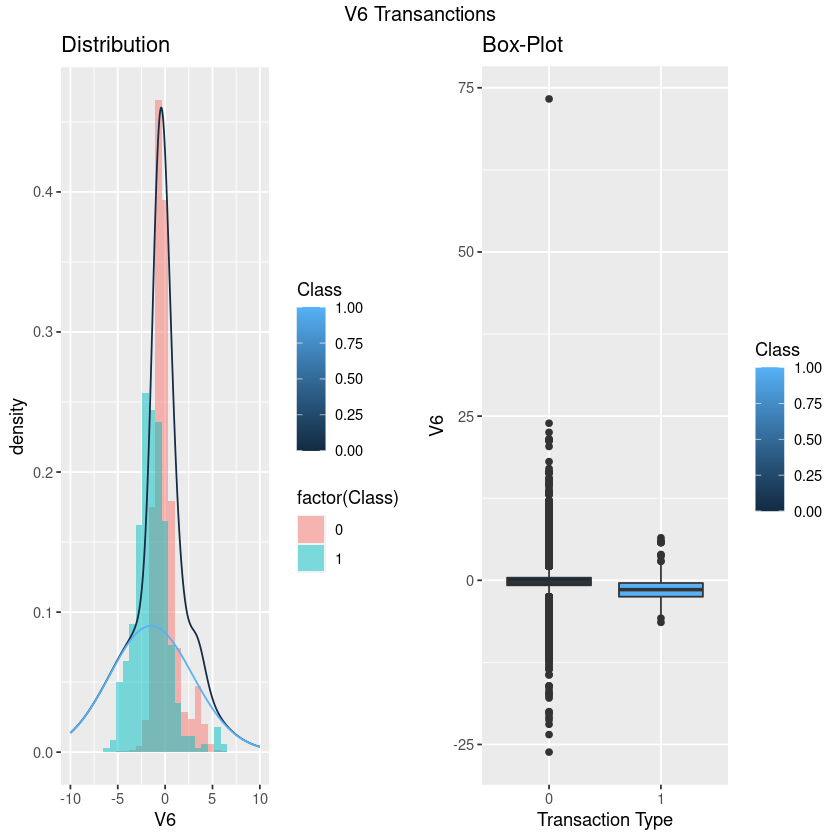

In [29]:
#for V6
p1 <- ggplot(data, aes(x = V6, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V6, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V6 Transanctions", ncol = 2)

In [30]:
#Distribution in histogram:mostly similar but at end a bit different
#Variation in box plot:similar
#Usefulness:may be useful

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 427 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 427 rows containing non-finite values (stat_density).”


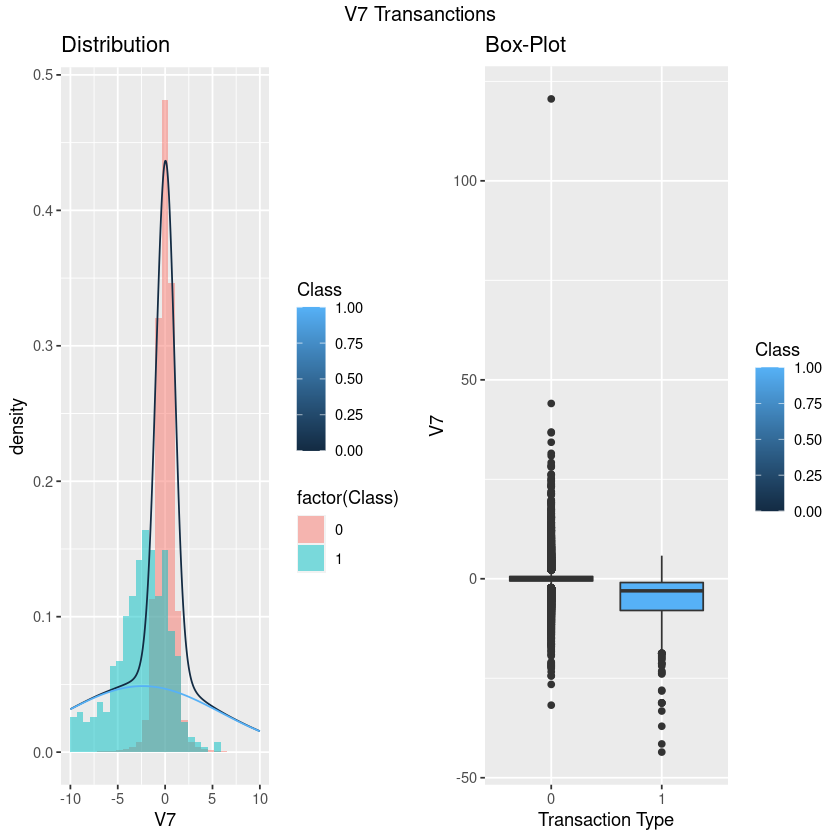

In [31]:
#for V7
p1 <- ggplot(data, aes(x = V7, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V7, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V7 Transanctions", ncol = 2)


In [32]:
#Distribution in histogram:some similar
#Variation in box plot:sililar except for some extreme points
#Usefulness:may be yes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 639 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 639 rows containing non-finite values (stat_density).”


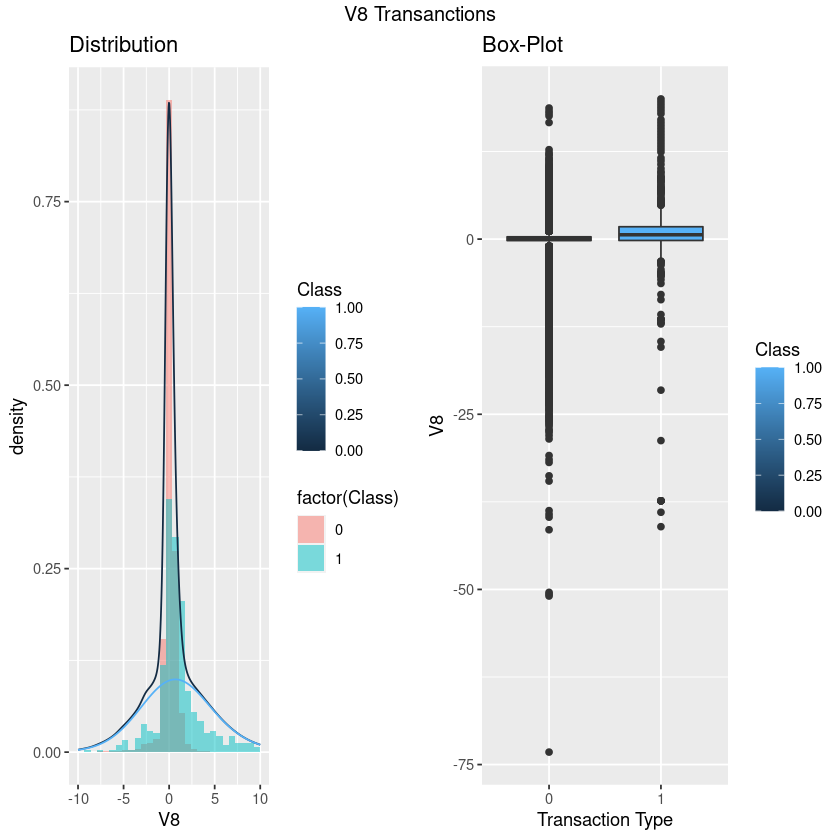

In [33]:
#forV8
p1 <- ggplot(data, aes(x = V8, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V8, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V8 Transanctions", ncol = 2)

In [34]:
#Distribution in histogram:identical
#Variation in box plot:identical
#Usefulness: no

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 10 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 10 rows containing non-finite values (stat_density).”


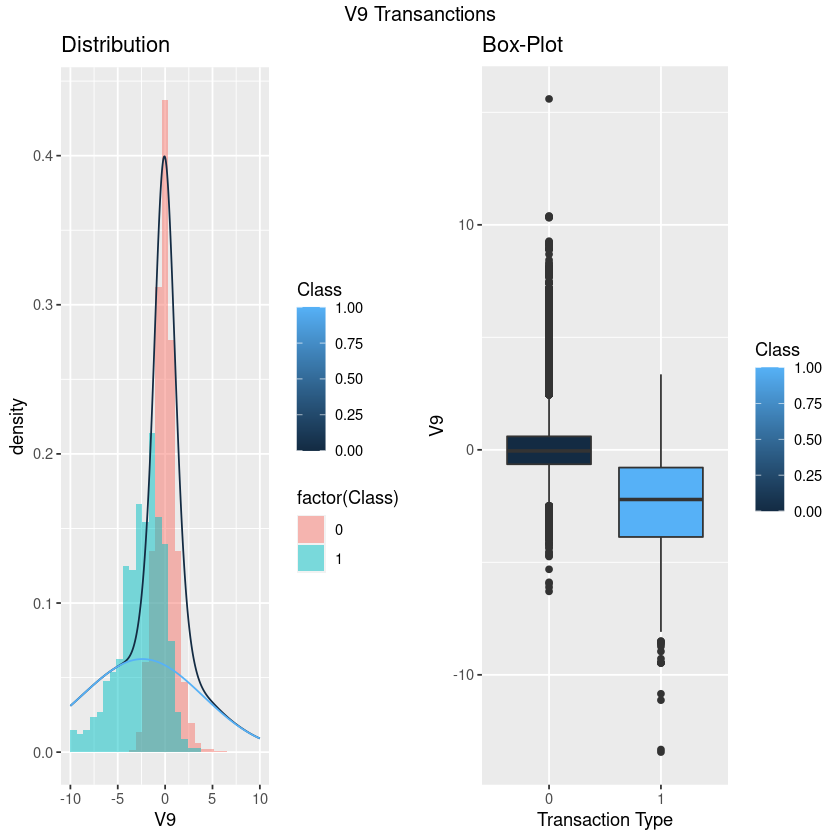

In [35]:
#for V9
p1 <- ggplot(data, aes(x = V9, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V9, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V9 Transanctions", ncol = 2)

In [36]:
#Distribution in histogram:similar
#Variation in box plot:mean is different but other than that completely similar
#Usefulness:due to mean maybe

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 284 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 284 rows containing non-finite values (stat_density).”


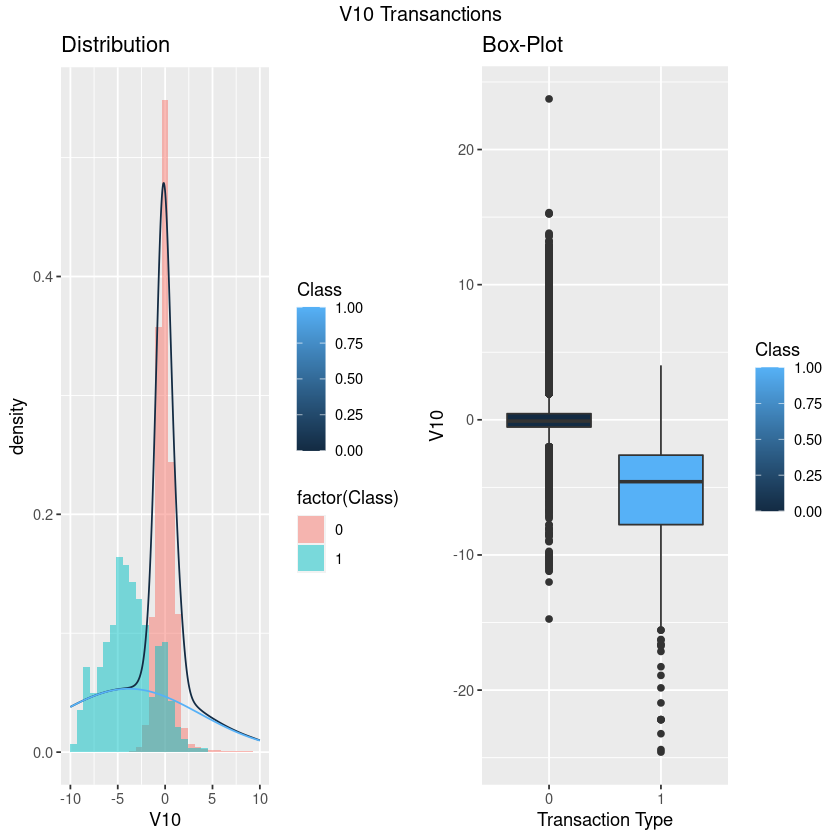

In [37]:
#for V10
p1 <- ggplot(data, aes(x = V10, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V10, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V10 Transanctions", ncol = 2)

In [38]:
#Distribution in histogram:mostly similar
#Variation in box plot:some similarity
#Usefulness:yes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


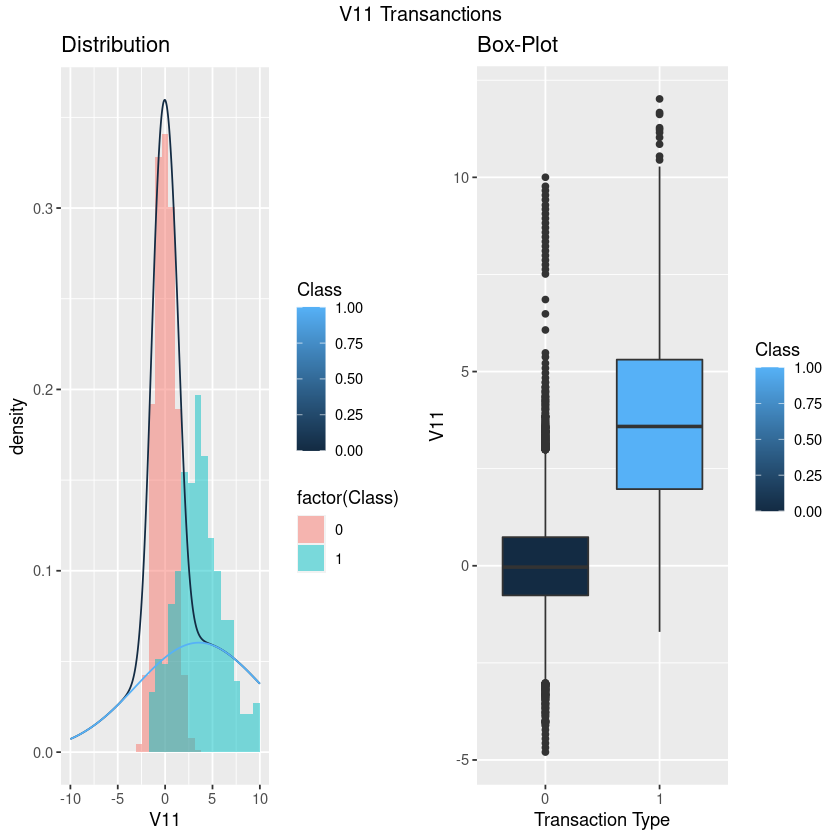

In [39]:
#for V11
p1 <- ggplot(data, aes(x = V11, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V11, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V11 Transanctions", ncol = 2)

In [40]:
#Distribution in histogram:initially different but them similar
#Variation in box plot:mostly not similar
#Usefulness:yes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 118 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 118 rows containing non-finite values (stat_density).”


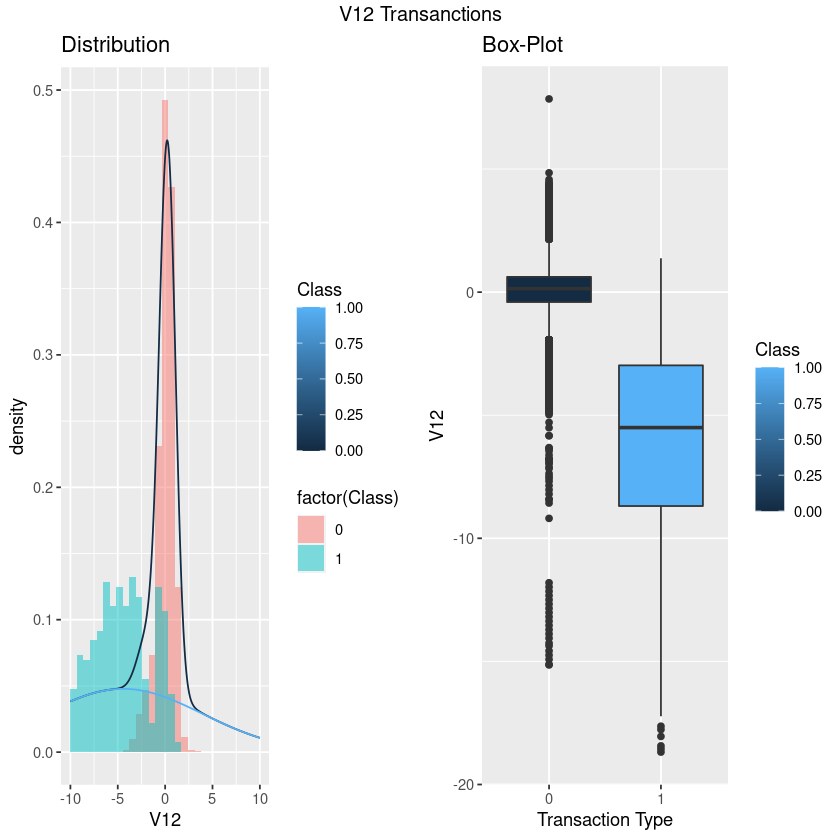

In [41]:
#for V12
p1 <- ggplot(data, aes(x = V12, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V12, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V12 Transanctions", ncol = 2)

In [42]:
#Distribution in histogram:mostly similar
#Variation in box plot:some overlap but rest different
#Usefulness:yes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



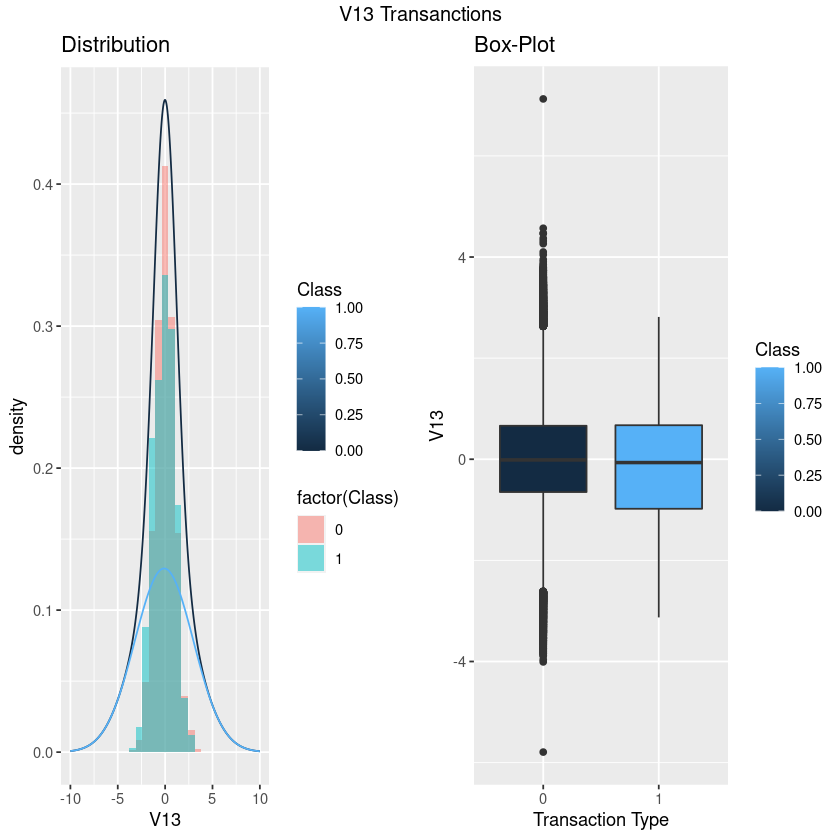

In [43]:
#for V13
p1 <- ggplot(data, aes(x = V13, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V13, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V13 Transanctions", ncol = 2)

In [44]:
#Distribution in histogram:similar
#Variation in box plot:similar
#Usefulness:no


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 137 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 137 rows containing non-finite values (stat_density).”


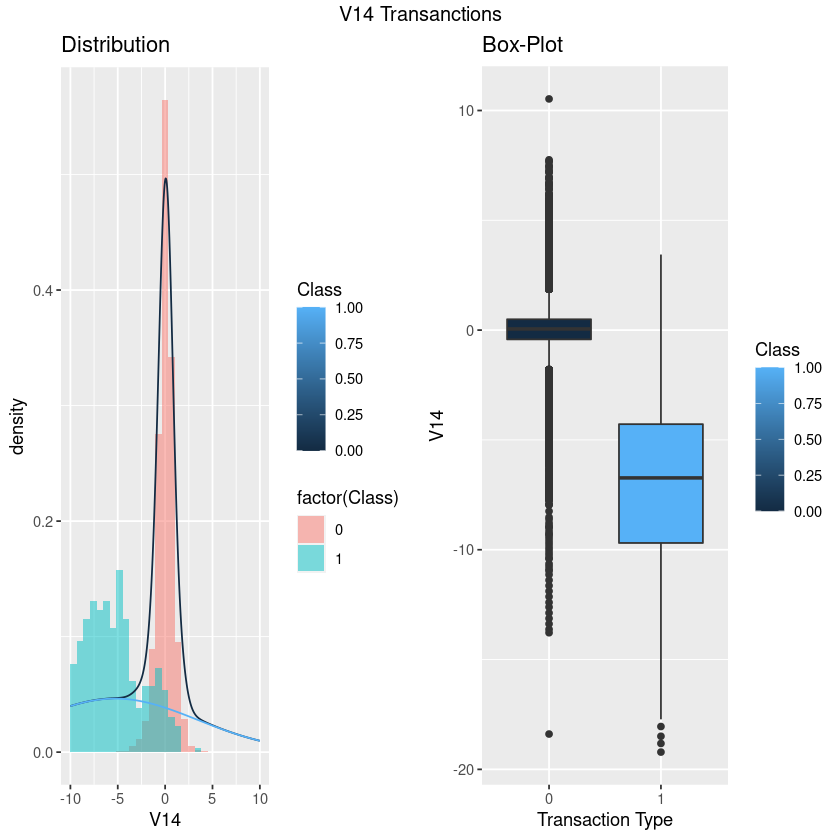

In [45]:
#for V14
p1 <- ggplot(data, aes(x = V14, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V14, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V14 Transanctions", ncol = 2)

In [46]:
#Distribution in histogram:not similar 
#Variation in box plot:not similar
#Usefulness:yes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



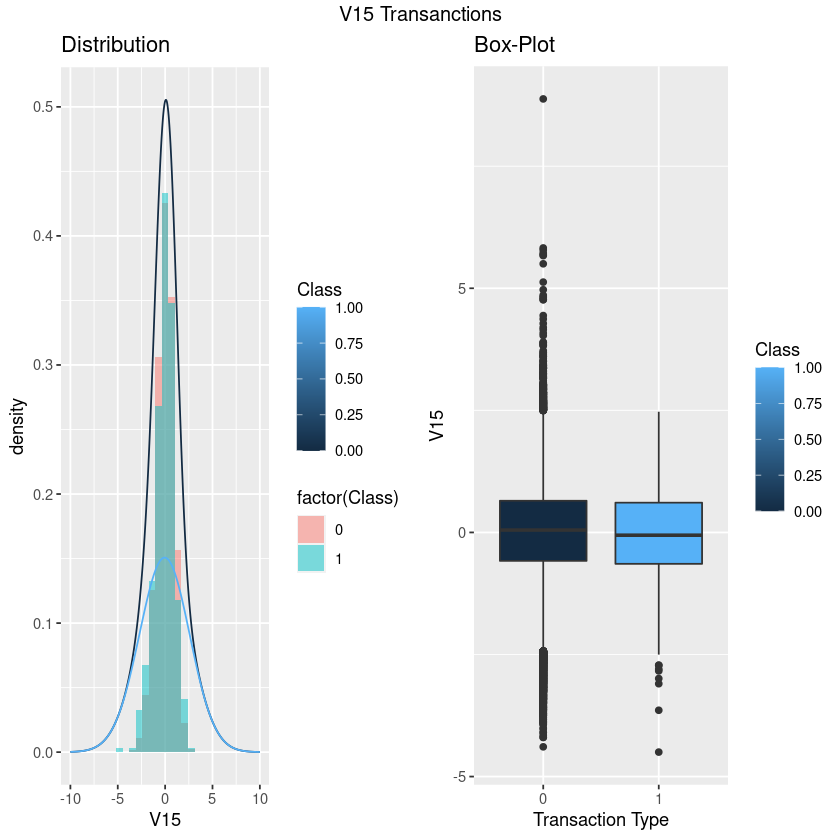

In [47]:
#for V15
p1 <- ggplot(data, aes(x = V15, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V15, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V15 Transanctions", ncol = 2)


In [48]:
#Distribution in histogram:similar
#Variation in box plot:mostly similar
#Usefulness:no


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 57 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 57 rows containing non-finite values (stat_density).”


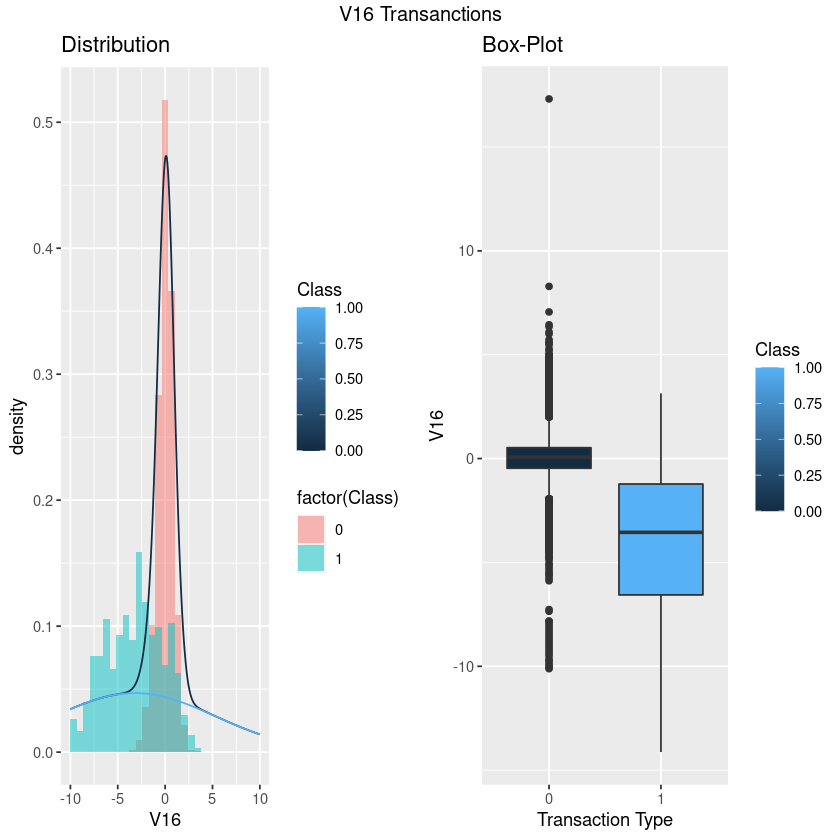

In [49]:
#for V16
p1 <- ggplot(data, aes(x = V16, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V16, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V16 Transanctions", ncol = 2)

In [50]:
#Distribution in histogram:not similar
#Variation in box plot:not similar
#Usefulness:no

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 180 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 180 rows containing non-finite values (stat_density).”


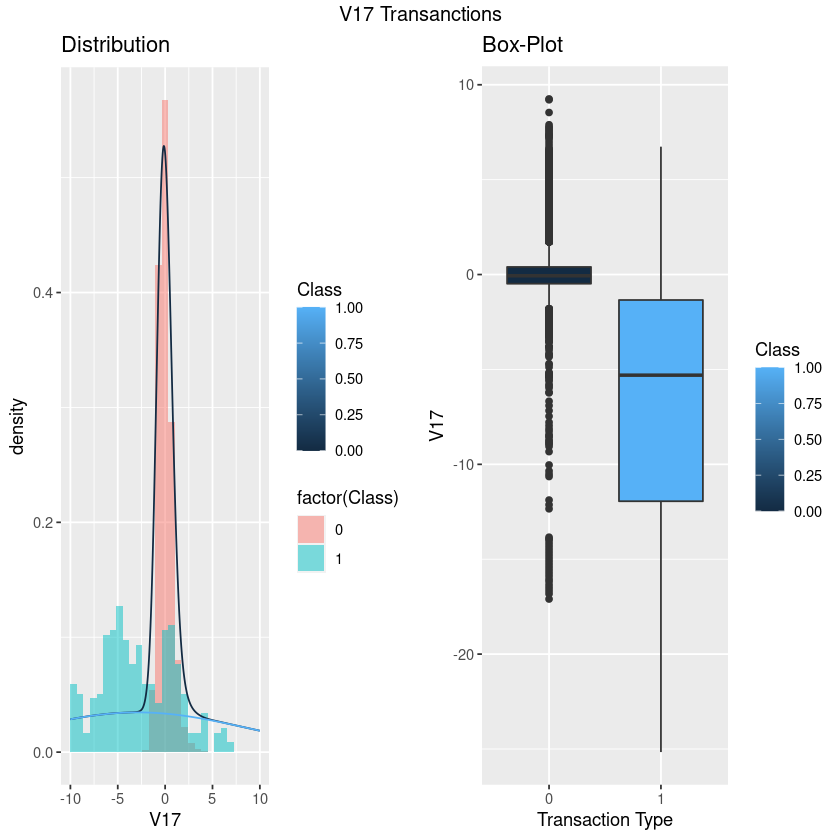

In [51]:
#for V17
p1 <- ggplot(data, aes(x = V17, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V17, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V17 Transanctions", ncol = 2)

In [52]:
#Distribution in histogram:not similar
#Variation in box plot:not similar
#Usefulness:yes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



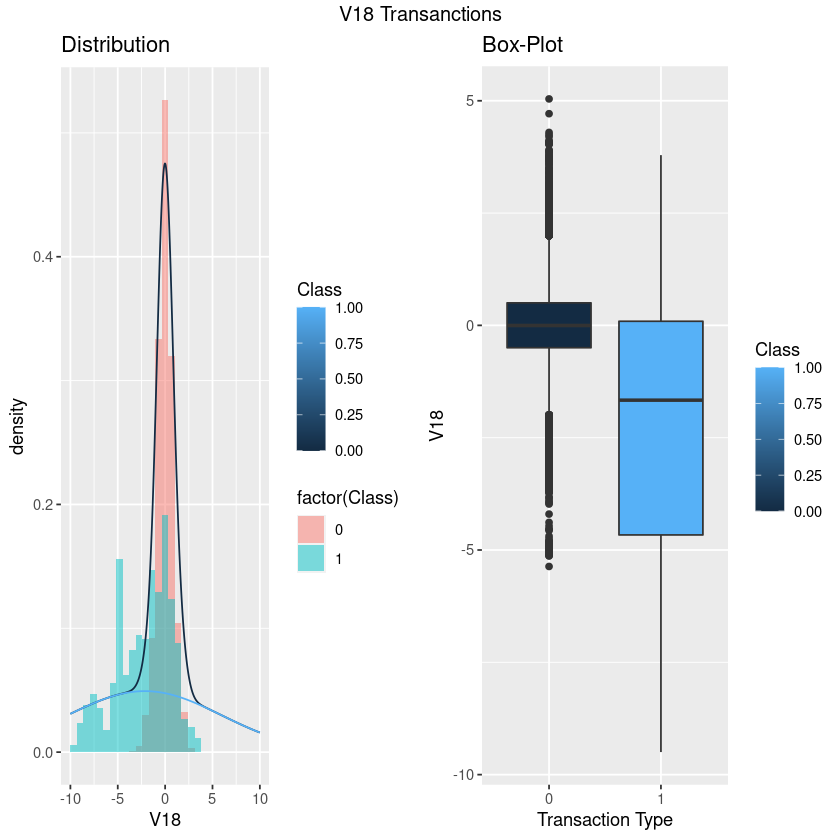

In [53]:
#for V18

p1 <- ggplot(data, aes(x = V18, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V18, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V18 Transanctions", ncol = 2)

In [54]:
#Distribution in histogram:some similarity
#Variation in box plot:not similar
#Usefulness:yes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



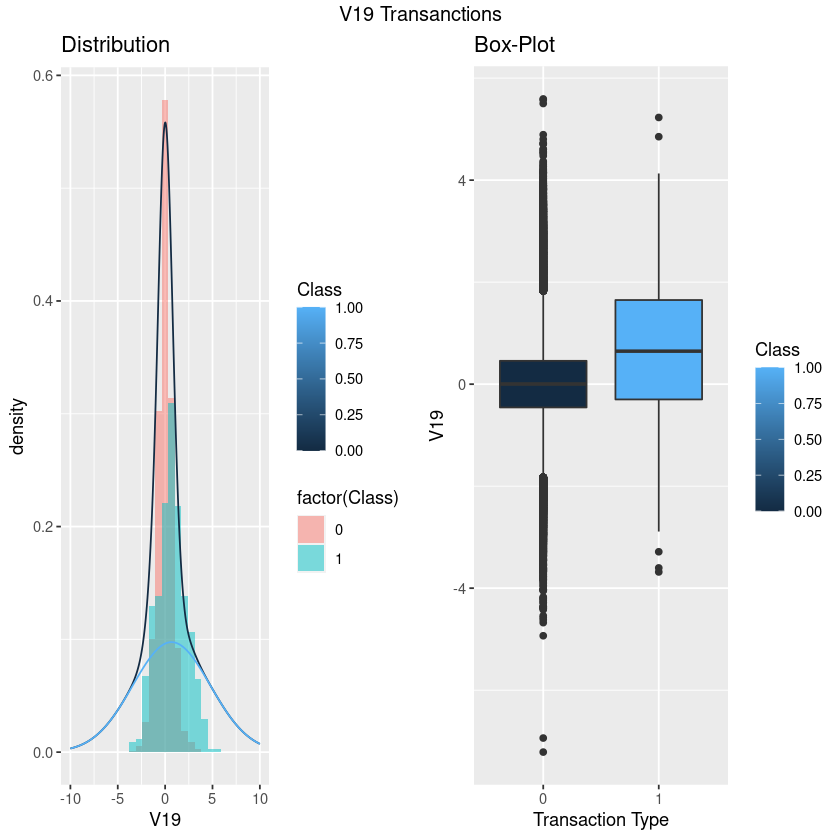

In [55]:
#for V19
p1 <- ggplot(data, aes(x = V19, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V19, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V19 Transanctions", ncol = 2)

In [56]:
#Distribution in histogram: identical
#Variation in box plot: similar
#Usefulness:no

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 179 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 179 rows containing non-finite values (stat_density).”


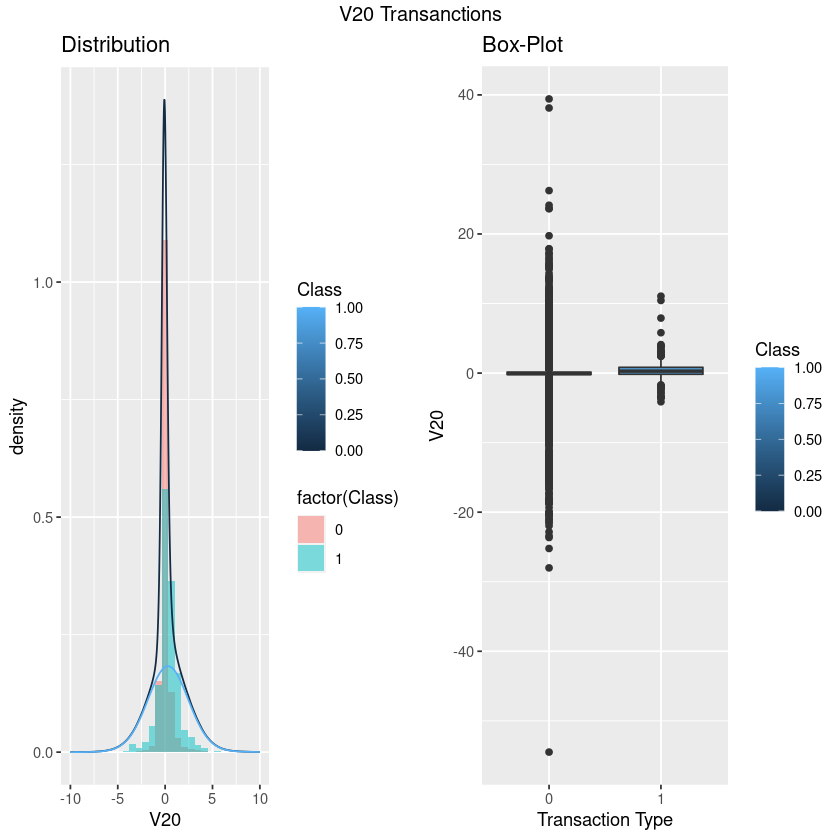

In [57]:
#for V20
p1 <- ggplot(data, aes(x = V20, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V20, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V20 Transanctions", ncol = 2)

In [58]:
#Distribution in histogram:identical
#Variation in box plot:identical
#Usefulness:no


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 230 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 230 rows containing non-finite values (stat_density).”


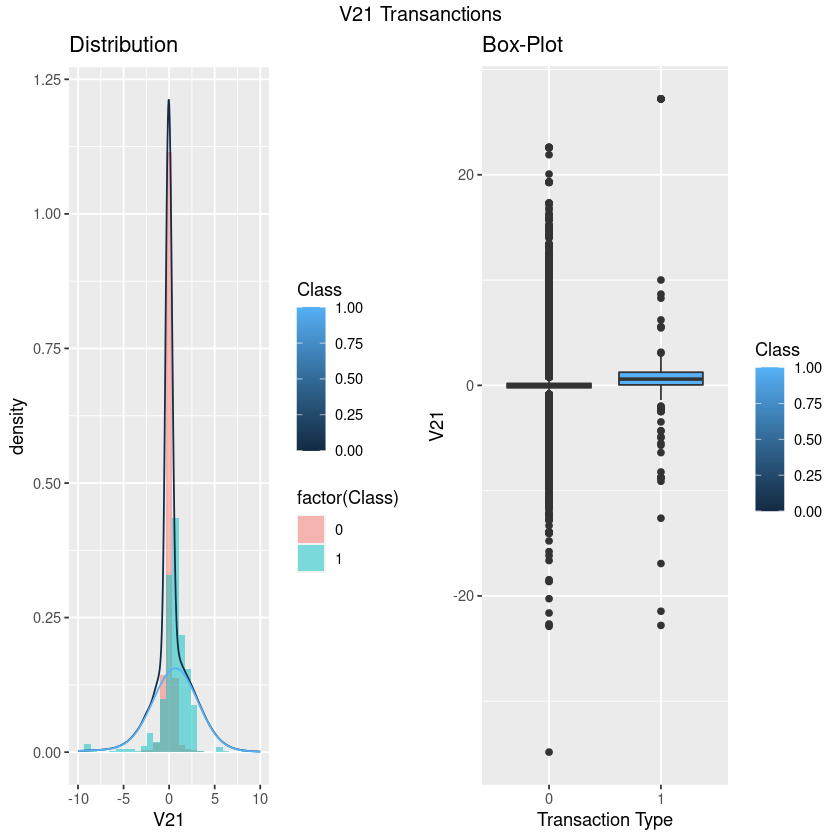

In [59]:
#forV21
p1 <- ggplot(data, aes(x = V21, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V21, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V21 Transanctions", ncol = 2)

In [60]:
#Distribution in histogram:similar initially 
#Variation in box plot:similar
#Usefulness:may be useful

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


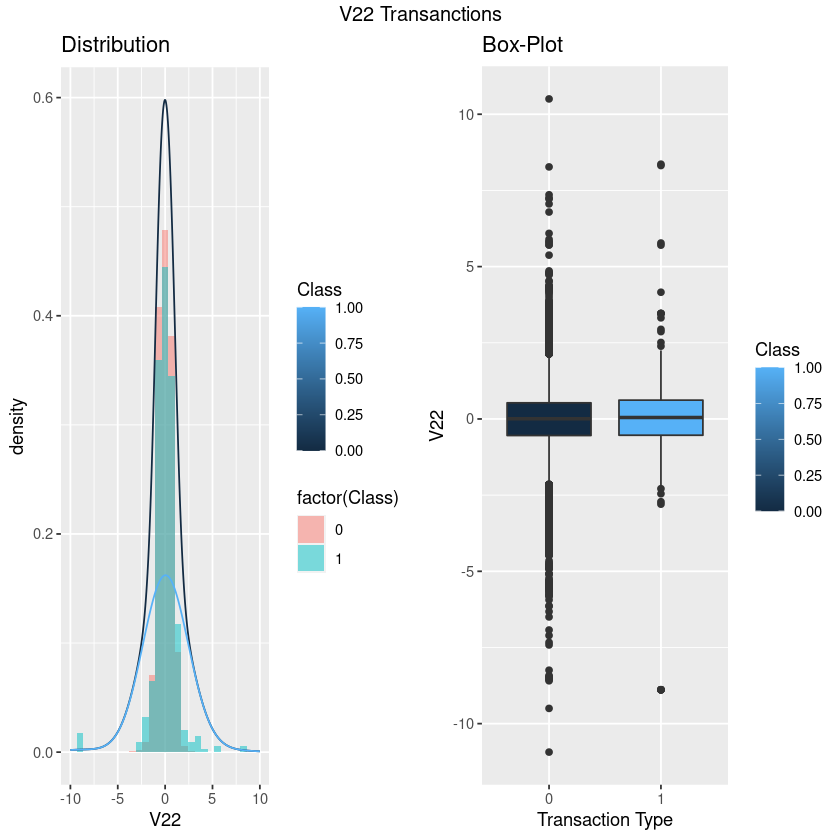

In [61]:
#for V22
p1 <- ggplot(data, aes(x = V22, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V22, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V22 Transanctions", ncol = 2)

In [62]:
#Distribution in histogram:identical
#Variation in box plot:identical
#Usefulness:no

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 140 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 140 rows containing non-finite values (stat_density).”


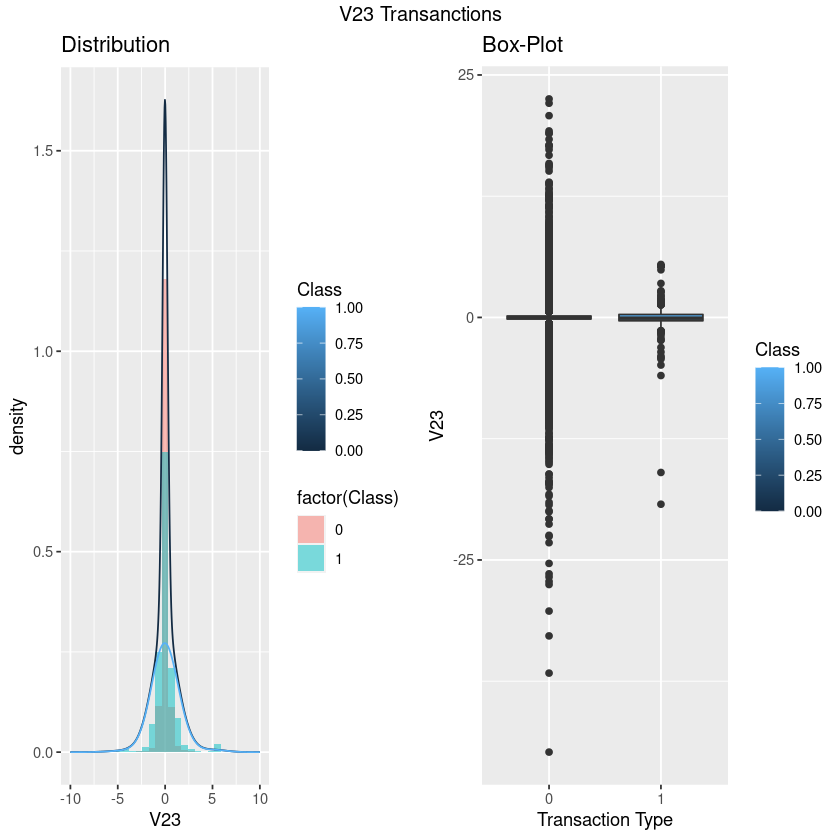

In [63]:
#for V23
p1 <- ggplot(data, aes(x = V23, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V23, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V23 Transanctions", ncol = 2)

In [64]:
#Distribution in histogram:identical
#Variation in box plot:similar
#Usefulness:no

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



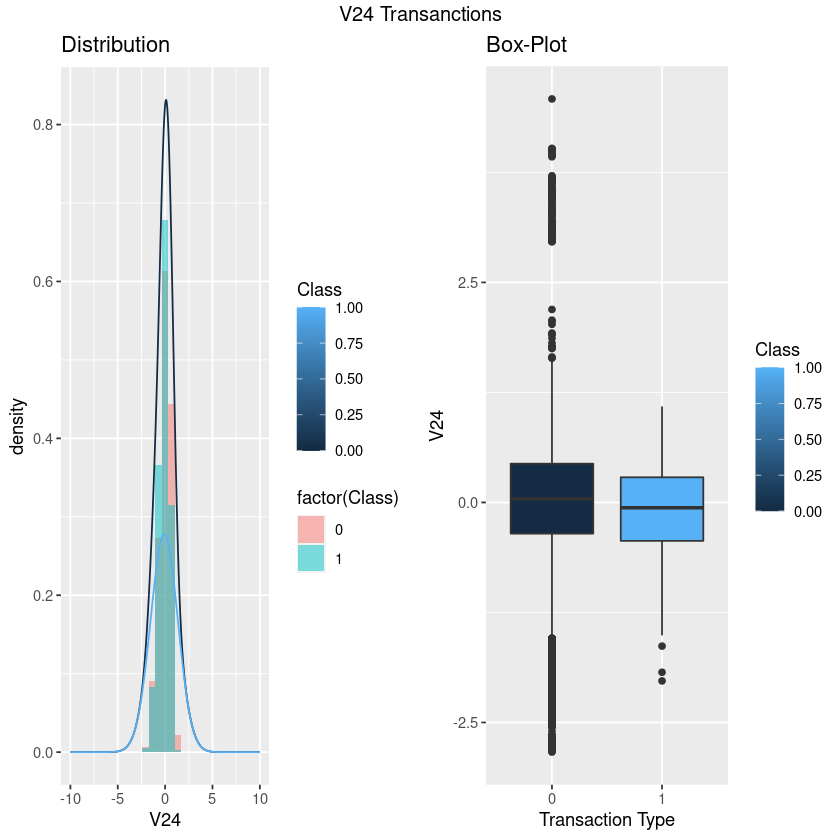

In [65]:
#for V24
p1 <- ggplot(data, aes(x = V24, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V24, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V24 Transanctions", ncol = 2)

In [66]:
#Distribution in histogram:similar
#Variation in box plot:similar
#Usefulness:no

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


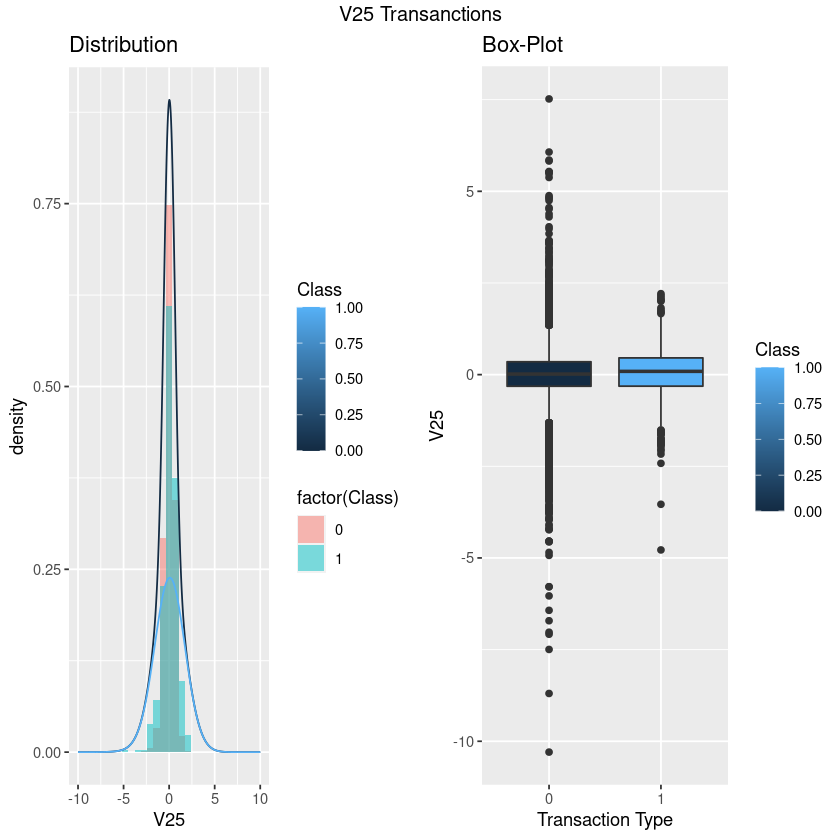

In [67]:
#for V25
p1 <- ggplot(data, aes(x = V25, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V25, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V25 Transanctions", ncol = 2)

In [68]:
#Distribution in histogram:similar
#Variation in box plot:similar
#Usefulness:no

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



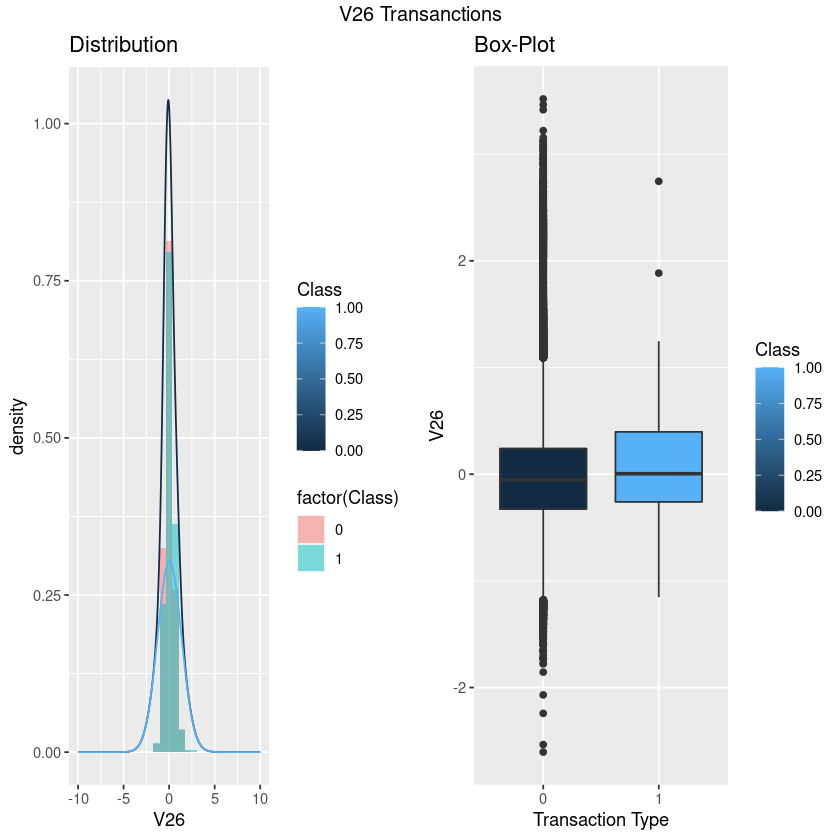

In [69]:
#for V26
p1 <- ggplot(data, aes(x = V26, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V26, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V26 Transanctions", ncol = 2)

In [70]:
#Distribution in histogram:similar
#Variation in box plot:similar
#Usefulness:no

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing non-finite values (stat_density).”


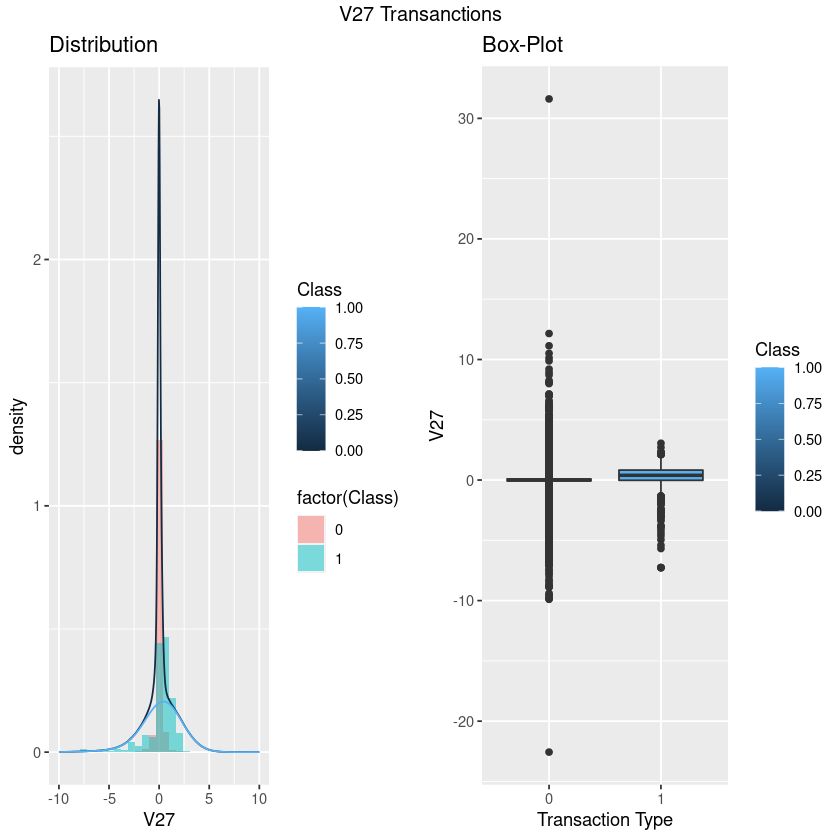

In [71]:
#for V27
p1 <- ggplot(data, aes(x = V27, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V27, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V27 Transanctions", ncol = 2)

In [72]:
#Distribution in histogram:identical
#Variation in box plot:similar
#Usefulness:no

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 25 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 25 rows containing non-finite values (stat_density).”


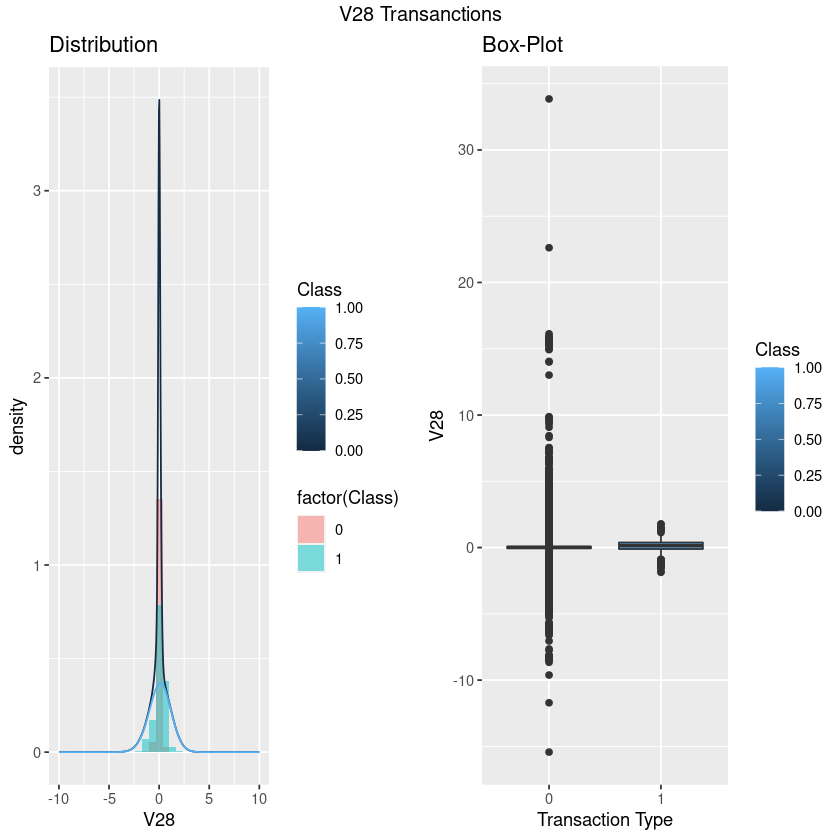

In [73]:
#for V28
p1 <- ggplot(data, aes(x = V28, fill = factor(Class))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity') + stat_density(geom = "line", aes(colour = Class), adjust = 10) + xlim(-10,10 ) + labs(title=expression("Distribution"))
p2 <- ggplot(data, aes(y=V28, x=factor(Class))) +  geom_boxplot(aes(fill = Class)) + labs(title=expression("Box-Plot")) + xlab("Transaction Type")
grid.arrange(p1, p2, top="V28 Transanctions", ncol = 2)

In [74]:
#Distribution in histogram:identical
#Variation in box plot:identical
#Usefulness:no

In [75]:
# Conclusion of EDA
#285k instances with 31 features
#PCA already permormed on data
#due to protection of data from theft the creator of data has chosen to remove the name of variables
#it was noticed that Time was cyclic therefore it means night or day data may be present need to convert to night and day accordingly
#normal transanctions followed cyclic approach whereas the fraud was distributed evenly
#V1 to V28 has no correlation to each other
#best variables will be V4, V11, V12 for prediction
#worst variables will be V13, V15, V22, V25, V26 for prediction